## Import the Modules

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read the CSV File

In [4]:
df = pd.read_csv(r"C:\Users\jangi\Downloads\Bengaluru_House_Data.csv")

## Check the data 

In [6]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [11]:
df.shape

(13320, 9)

In [17]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.society.describe()

count        7818
unique       2688
top       GrrvaGr
freq           80
Name: society, dtype: object

## Check the Null Values

In [20]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Check the Duplicate Value

In [27]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


## Drop the Duplicate value

In [89]:
df.drop_duplicates(inplace = True)

In [90]:
df.duplicated().sum()

0

## Treat(Fill) the Null Values

- Two ways to treat the null values.
- 1, Drop(removes) all the null values.
- 2, Filling the null values with some other value.

In [35]:
df.isna().sum().sort_values(ascending=False) 

society         5328
balcony          605
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

# Check the type of Location column of  values 

In [40]:
df.nunique().sort_values(ascending=True) 

area_type          4
balcony            4
bath              19
size              31
availability      81
location        1305
price           1994
total_sqft      2117
society         2688
dtype: int64

In [42]:
df.location.dtype

dtype('O')

In [48]:
df.location.mode()

0    Whitefield
Name: location, dtype: object

In [49]:
df.location.mode()[0]

'Whitefield'

- i.e index = 0 
- i.e location is column name which present in the dataset.
- i.e whitefield is the values in the column(location) which is repeated or have highest frequnecy.

# Filling  the null values of Location column

- fillna

In [50]:
df.location.fillna(df.location.mode()[0], inplace = True)

In [51]:
df.location.isna().sum()

0

In [52]:
df.isna().sum()

area_type          0
availability       0
location           0
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

# Check the type of Size column of null  values
- we are taking size column in ["size"] b'cuz its as also a attribute(define function)

In [66]:
df["size"].dtype

dtype('O')

# Filling  the null values of Location column

In [55]:
df["size"].fillna(df["size"].mode()[0], inplace = True)

In [57]:
df["size"].isna().sum()

0

# Check the type of society column of null values

In [58]:
df.society.dtype

dtype('O')

In [60]:
missing_percentages = df.society.isna().sum()*100/len(df)
missing_percentages

41.654288171370496

- when any column has more then 30% values as the null values we drop that column.
- if that column is not affecting the table then also we can drop it.
- Both this conditions should be fullfilled to drop a column.

In [61]:
df.drop("society" , axis = 1, inplace = True)

- Axis 1 = its takes the column only vlaues.
- Axis 0 = its takes the row only vlaues 

In [62]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Check the type of Bath column of null  values

In [64]:
df.bath.dtype

dtype('float64')

In [65]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

# Filling  the null values of Bath column
- As we can see bath is float type value still we will use mode(numerical value) method to fill the null values b'cuz the data is lot more then the unique value in bath i'e , the value is getting repeated a lot number of times the it should be treated

In [76]:
df.bath.fillna(df.bath.mode()[0], inplace = True)

In [77]:
df.bath.isna().sum()

0

In [78]:
df.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

# Check the type of Balcony column of null  values

In [80]:
df.balcony.dtype

dtype('float64')

In [81]:
df.balcony.nunique()

4

# Filling  the null values of Balcony column

In [82]:
df.balcony.fillna(df.balcony.mode()[0], inplace = True)

In [83]:
df.balcony.isna().sum()

0

# Check Duplicate value

In [84]:
df.duplicated().sum()

40

## Drop the Duplicate value

In [87]:
df.drop_duplicates(inplace = True)

In [88]:
df.duplicated().sum()

0

# Check the Outliers 
- A few data points that are significently different from the rest of the data points 
- if any data points is far from the mean values can be treated as outliers
- outliers are only checked for numerical values
- to detect outliers we used boxplots

# Check the Outliers of Price Column

<Axes: ylabel='price'>

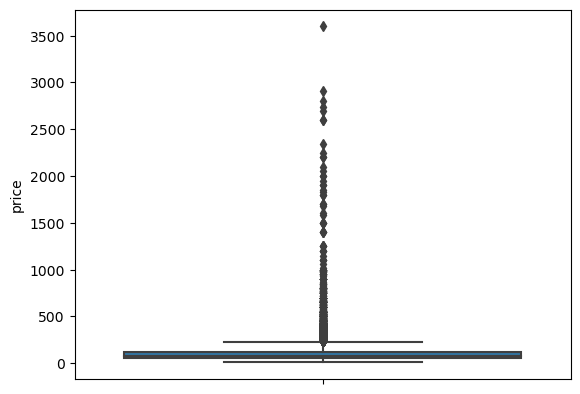

In [92]:
sns.boxplot(y = "price", data = df)

In [93]:
df.price.describe()

count    12751.000000
mean       114.492961
std        151.676492
min          8.000000
25%         50.000000
50%         73.000000
75%        122.000000
max       3600.000000
Name: price, dtype: float64

# Check the Outliers of Total_Sqft Column

In [94]:
df.total_sqft.dtype

dtype('O')

In [98]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [117]:
index = df[df.total_sqft.str.contains('-')].index

In [118]:
index

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12435, 12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240,
            13265],
           dtype='int64', length=200)

In [100]:
df.total_sqft.str.contains("-")

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315    False
13316    False
13317    False
13318    False
Name: total_sqft, Length: 12751, dtype: bool

In [101]:
df[df.total_sqft.str.contains("-")]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,2.0,2.0,52.570


In [102]:
current_sqft = df[df.total_sqft.str.contains("-")]["total_sqft"].str.split("-")

In [103]:
current_sqft 

30       [2100 ,  2850]
56       [3010 ,  3410]
81       [2957 ,  3450]
122      [3067 ,  8156]
137      [1042 ,  1105]
              ...      
12975     [850 ,  1060]
12990    [1804 ,  2273]
13059    [1200 ,  1470]
13240    [1020 ,  1130]
13265    [1133 ,  1384]
Name: total_sqft, Length: 200, dtype: object

In [137]:
lst=[]
for i in current_sqft :
    lst.append((float(i[0]) + float (i[1]))/2)

In [139]:
print(lst)

[2475.0, 3210.0, 3203.5, 5611.5, 1073.5, 1242.5, 1277.5, 1630.0, 1317.5, 1800.0, 1132.5, 5520.0, 4046.0, 5600.0, 1177.5, 4624.5, 1122.5, 582.5, 1142.5, 4348.5, 657.5, 649.5, 1450.0, 1000.0, 971.5, 1662.0, 687.325, 615.0, 3430.0, 2038.5, 3715.0, 665.0, 4624.5, 776.5, 2817.5, 3817.0, 3461.0, 1277.5, 825.0, 1128.76, 3715.0, 1104.0, 790.5, 3035.0, 3181.0, 3539.5, 2856.0, 700.0, 1559.0, 1352.5, 1800.0, 1950.0, 1185.5, 1005.0, 1707.0, 1476.0, 3181.0, 1192.5, 2912.5, 630.5, 1530.0, 717.0, 1664.0, 3185.0, 4303.5, 1343.5, 3416.5, 1312.5, 1137.5, 458.0, 2345.0, 709.0, 605.0, 2094.0, 2987.5, 2072.5, 1089.0, 1625.0, 2661.0, 680.0, 412.5, 3752.5, 805.5, 709.0, 1462.5, 1891.0, 1617.5, 1302.5, 975.0, 2585.5, 630.5, 2648.0, 614.5, 4334.0, 2336.5, 1302.5, 3317.5, 1405.0, 1532.5, 3550.0, 2856.0, 2856.0, 1583.0, 1115.0, 1162.5, 1580.0, 1272.5, 925.0, 2856.0, 698.5, 1730.0, 1431.5, 4062.5, 1029.5, 2195.0, 1495.0, 778.0, 1155.0, 3496.5, 1700.0, 1522.5, 784.0, 3385.5, 777.0, 2464.5, 640.0, 1773.5, 3854.5, 3

In [140]:
df.loc[index,'total_sqft']=lst

In [143]:
df.loc[index]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2475.0,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3210.0,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,3203.5,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,5611.5,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1073.5,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,955.0,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,2038.5,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1335.0,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1075.0,2.0,2.0,52.570


In [146]:
df.total_sqft.replace('[A-za-z. ]','', regex =True, inplace = True)

In [186]:
df.total_sqft = df.total_sqft.astype(float)

<Axes: ylabel='total_sqft'>

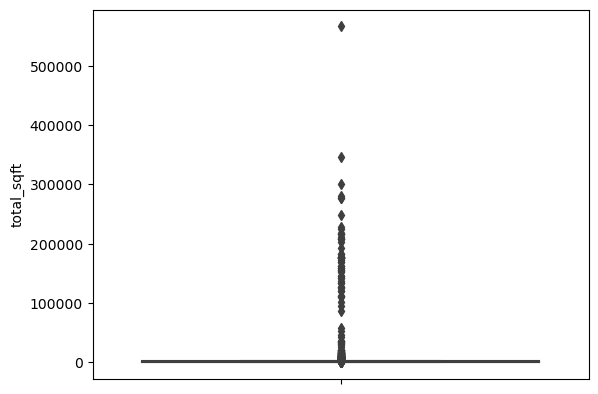

In [187]:
sns.boxplot(y="total_sqft" , data=df )

In [150]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

# Fix outlier or Remove outlier

# IQR Method :-
- we can cap the value between the upper bound and lower bound

In [165]:
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return data.clip(upper_bound,lower_bound)

   

In [166]:
df["Total"] = outlier(df.total_sqft)

In [167]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0


In [175]:
df[["total_sqft","Total"]].describe()

,total_sqft,Total
count,12751.000000,12751.000000
mean,2436.581412,1445.561218
std,13206.996703,551.105820
min,1.000000,200.000000
25%,1100.000000,1100.000000
50%,1285.000000,1285.000000
75%,1700.000000,1700.000000
max,566584.000000,2600.000000


<Axes: ylabel='Total'>

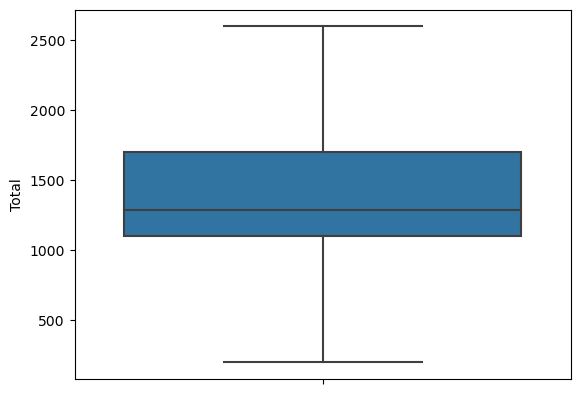

In [185]:
sns.boxplot(y="Total" , data=df )

# Check the Outliers of Price Column

In [176]:
df["New_price"] = outlier(df.price)

In [177]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [178]:
df[["price","New_price"]].describe()

,price,New_price
count,12751.000000,12751.000000
mean,114.492961,94.929162
std,151.676492,61.225221
min,8.000000,8.000000
25%,50.000000,50.000000
50%,73.000000,73.000000
75%,122.000000,122.000000
max,3600.000000,230.000000


<Axes: ylabel='New_price'>

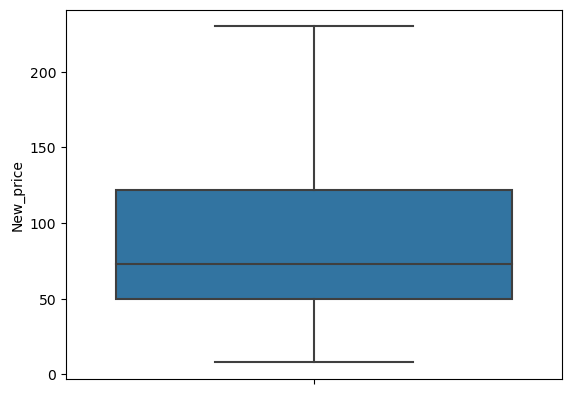

In [188]:
sns.boxplot(y="New_price" , data=df )

# Analysis of the dataset

# Average cost of ready to move, built up area, plot area and super built up area.

In [189]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

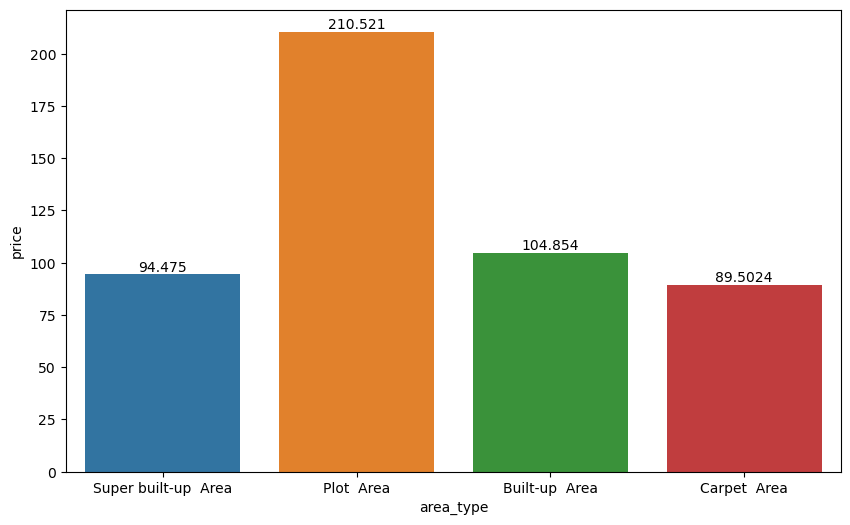

In [199]:
plt.figure(figsize = (10,6), dpi = 100)
ax = sns.barplot(x = "area_type", y = "price", data = df, ci = False)
for i in ax.containers:
    ax.bar_label(i)
    
plt.show()


# Relationship between price and total_sqft

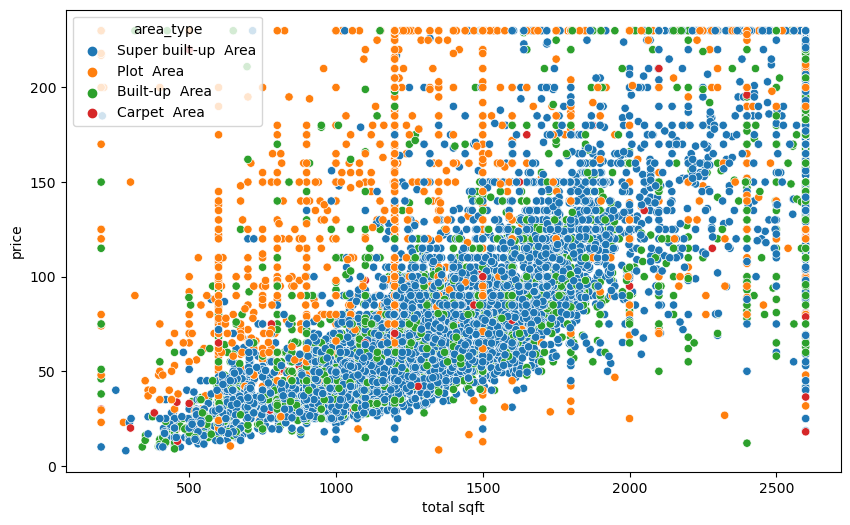

In [201]:
plt.figure(figsize = (10,6), dpi = 100)
ax = sns.scatterplot(x = "Total", y = "New_price", hue = "area_type" ,data = df)
plt.xlabel("total sqft")
plt.ylabel("price")
    
plt.show()

# Obesveration according to the area type

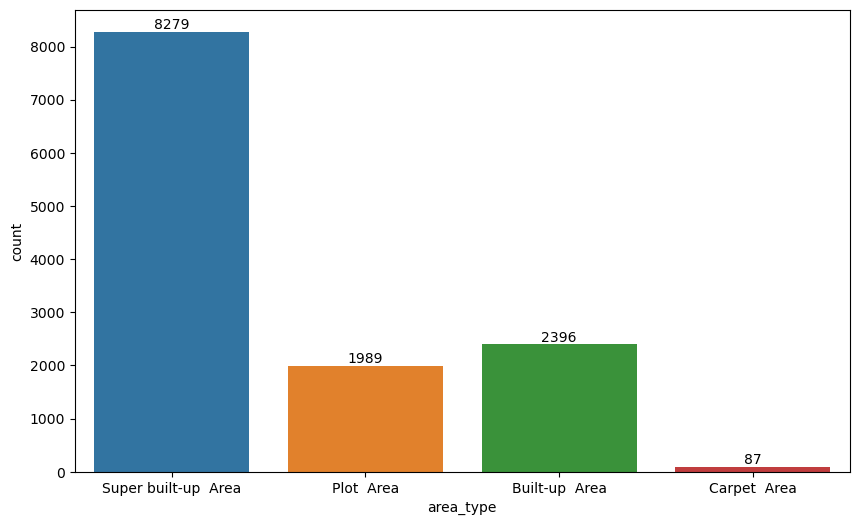

In [202]:
plt.figure(figsize = (10,6), dpi = 100)
ax = sns.countplot(x = "area_type",data = df)

for i in ax.containers:
    ax.bar_label(i)

# Ratio of the area type

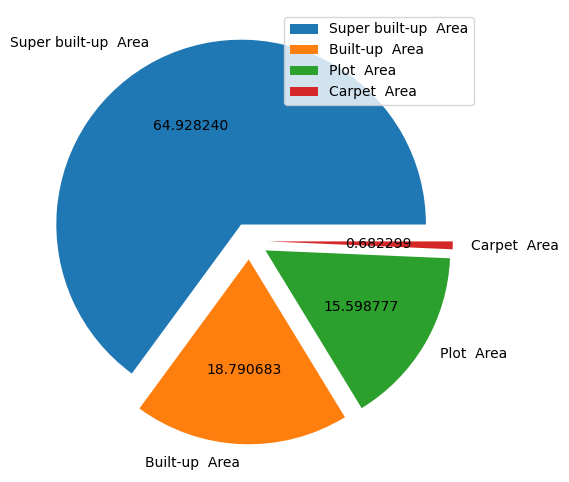

In [204]:
plt.figure(figsize = (10,6), dpi = 100)
plt.pie(df.area_type.value_counts(), labels = df.area_type.value_counts().index,
        autopct = "%2f", explode = (0.1,0.1,0.1,0.1))
plt.legend()
plt.show()

# Average price of 2,3,4BHK

In [214]:
x = df[(df["size"] == "2 BHK") | (df["size"] == "3 BHK") | (df["size"] == "4 BHK")] 
x

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,1170.0,38.00
...,...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,1262.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,1715.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,2600.0,230.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,1141.0,60.00


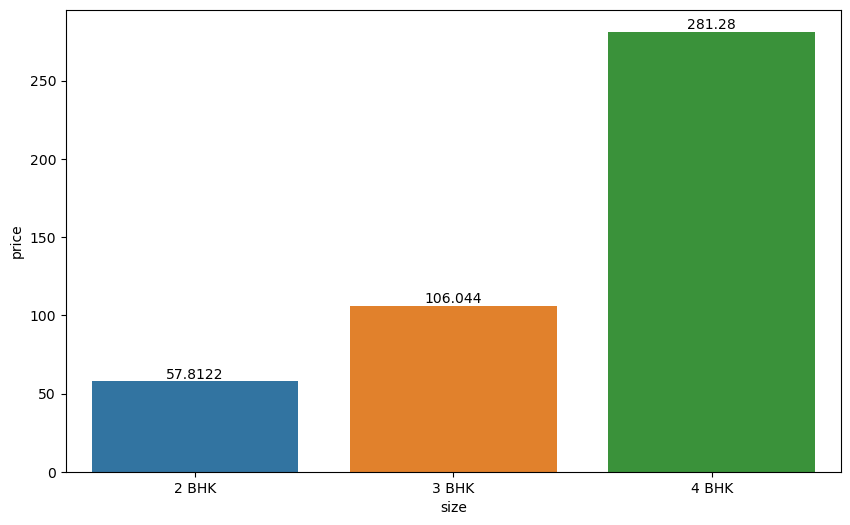

In [215]:
plt.figure(figsize = (10,6), dpi = 100)
ax=sns.barplot(x = "size", y = "price", data = x, ci = False)


for i in ax.containers:
    ax.bar_label(i)

plt.show()

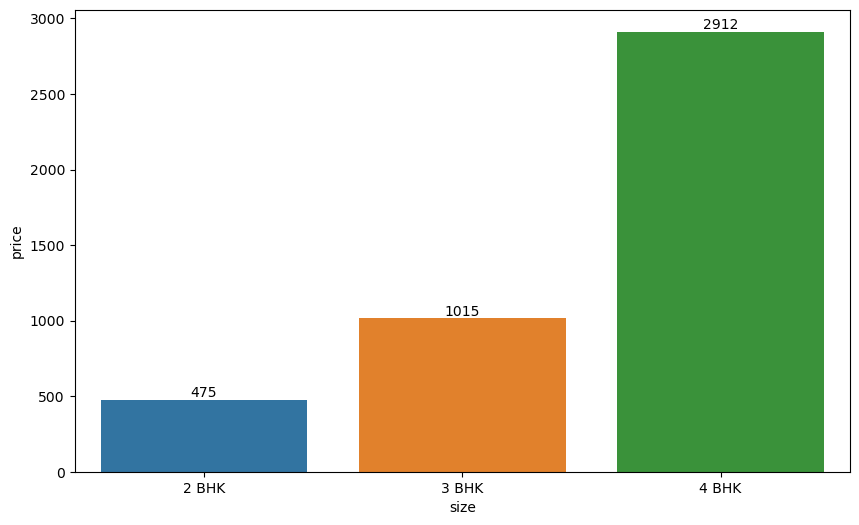

In [216]:
plt.figure(figsize = (10,6), dpi = 100)
ax=sns.barplot(x = "size", y = "price", data = x, ci = False , estimator = np.max)


for i in ax.containers:
    ax.bar_label(i)

plt.show()

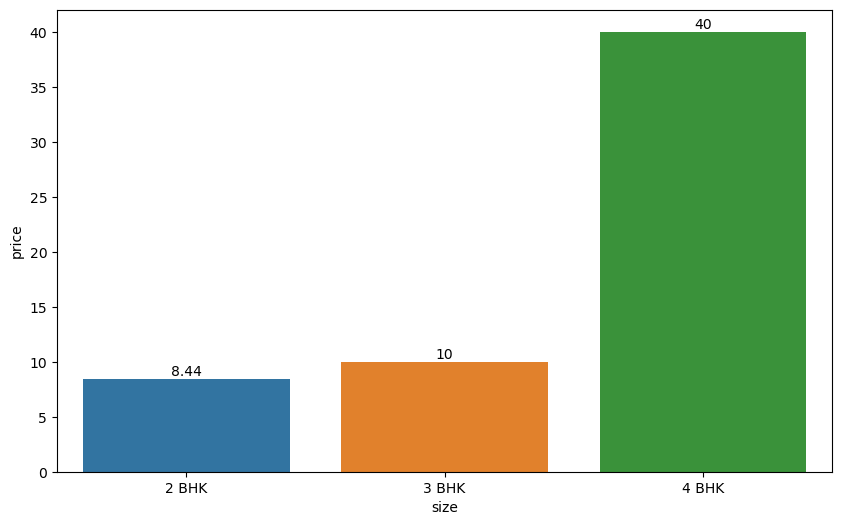

In [217]:
plt.figure(figsize = (10,6), dpi = 100)
ax=sns.barplot(x = "size", y = "price", data = x, ci = False , estimator = np.min)


for i in ax.containers:
    ax.bar_label(i)

plt.show()

# Check Correlation

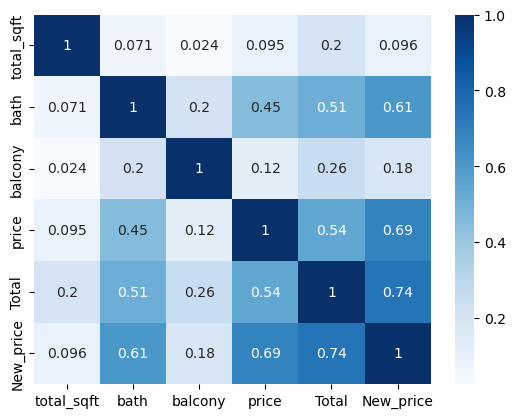

In [218]:
df.corr()


sns.heatmap(df.corr(), annot = True , cmap = "Blues")
plt.show()